In [1]:
import pandas as pd
import numpy as np

In [109]:
data=pd.read_csv("netflix.csv")

In [110]:
print("1. shape=",data.shape,"\n2. data_size=",data.size,"\n3. column attributes=",data.columns,"\n4. data_types present=\n",data.dtypes)

1. shape= (7789, 11) 
2. data_size= 85679 
3. column attributes= Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object') 
4. data_types present=
 Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


**Is there any duplicate data in dataset, if yes remove them**

In [112]:
data[data.duplicated()] #This will detect duplicate rows

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [114]:
data.drop_duplicates(inplace=True) #this will remove duplicate rows

**Is there any null value present in the dataset? show with head map**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

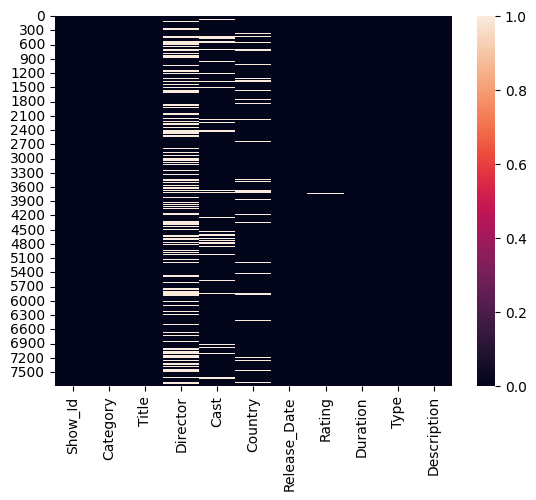

In [38]:
sns.heatmap(data.isnull())
plt.show()

**For 'House of Card' what is the show id and who is the director of the show**

In [54]:
data[data['Title']=='House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [55]:
#next method using isin()

In [57]:
data[data['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [58]:
#next method using str.contains()

In [72]:
data[data['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


**In which year highest number of the TV Shows & Movies were released ? Show with Bar Graph.**

In [122]:
data['Date_N']=pd.to_datetime(data['Release_Date'],format='mixed')

In [156]:
data['Date_N'].dt.year.value_counts()

Date_N
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

**plot this info in bar graph**

<Axes: xlabel='Date_N'>

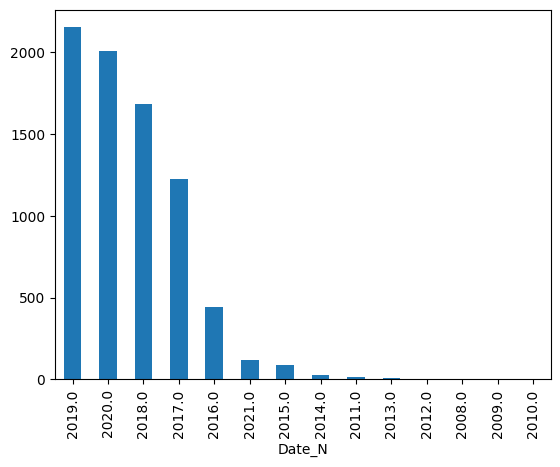

In [131]:
data['Date_N'].dt.year.value_counts().plot(kind='bar')

**How many movies and TV shows in the dataset and show in bar graph**

In [132]:
data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


In [150]:
data.groupby('Category').count()

,Show_Id,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
Category,,,,,,,,,,,
Movie,5377,5377,5214,4951,5147,5377,5372,5377,5377,5377,5377
TV Show,2410,2410,185,2118,2133,2400,2408,2410,2410,2410,2400


<Axes: xlabel='Category'>

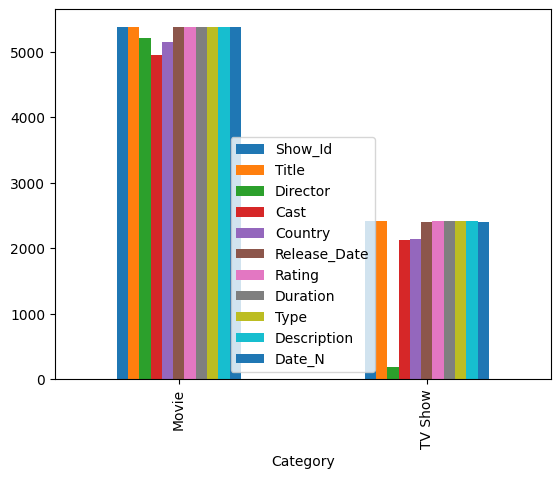

In [154]:
data.groupby('Category').count().plot(kind="bar")

<Axes: xlabel='count', ylabel='Category'>

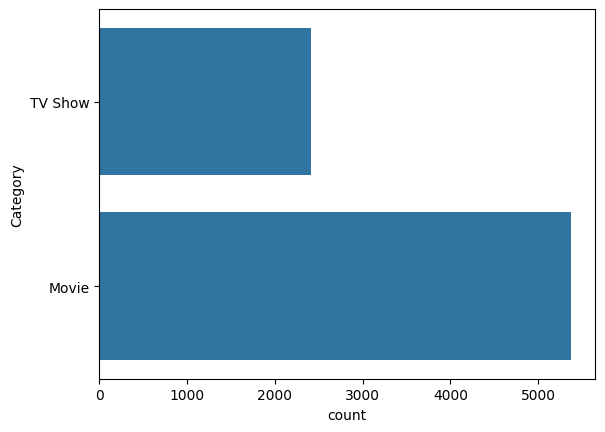

In [160]:
sns.countplot(data['Category'])

**Show all the movies that were released on year 2020**

In [169]:
data['Year']=data.Date_N.dt.year

In [186]:
data[(data['Category']=="Movie") & (data['Year']==2020)].head(3)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01,2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0


**Show only the Titles of all TV Shows that were released in India only.**

In [193]:
data[(data['Country']=="Spain") & (data['Category']=="TV Show")]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year
112,s113,TV Show,45 rpm,NaN,"Carlos Cuevas, Guiomar Puerta, Iván Marcos, Is...",Spain,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, Spa...","In 1960s Madrid, music producer Guillermo Roja...",2019-08-16,2019.0
559,s560,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017-09-08,2017.0
941,s942,TV Show,Bitter Daisies,Miguel Conde,"María Mera, Toni Salgado, Miquel Insua, Denis ...",Spain,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",While investigating the disappearance of a tee...,2019-03-29,2019.0
1163,s1164,TV Show,Cable Girls,NaN,"Blanca Suárez, Nadia de Santiago, Ana Fernánde...",Spain,TV-MA,6 Seasons,"International TV Shows, Romantic TV Shows, Spa...","In 1920s Madrid, four women at the National Te...",2020-07-03,2020.0
1246,s1247,TV Show,Cathedral of the Sea,NaN,"Daniel Grao, Ginés García Millán, Óscar Hernán...",Spain,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In 14th-century Barcelona, a serf's determined...",2018-08-31,2018.0
1413,s1414,TV Show,Cleo & Cuquin,Fernando Moro,NaN,Spain,TV-Y,2 Seasons,Kids' TV,Spirited sister-brother duo Cleo and Cuquín tr...,2020-07-01,2020.0
1442,s1443,TV Show,Cocaine Coast,NaN,"Javier Rey, Tristán Ulloa, Antonio Durán 'Morr...",Spain,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","In 1980s Galicia, Spain, a young fisherman bec...",2018-08-03,2018.0
1540,s1541,TV Show,Criminal: Spain,Mariano Barroso,"Emma Suárez, Jorge Bosch, Álvaro Cervantes, Ca...",Spain,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",Psychological games abound between detectives ...,2019-09-20,2019.0
1882,s1883,TV Show,Drug Squad: Costa del Sol,NaN,"Hugo Silva, Álvaro Cervantes, Miki Esparbé, Je...",Spain,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",Four intrepid and impulsive police officers fo...,2019-10-25,2019.0
1943,s1944,TV Show,El Barco,NaN,"Juanjo Artero, Mario Casas, Blanca Suárez, Ire...",Spain,NR,3 Seasons,"International TV Shows, Romantic TV Shows, Spa...",Forty young crew members traveling aboard a tr...,2017-07-01,2017.0


**Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix**

In [206]:
data['Director'].value_counts().sort_values(ascending=False).head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Shannon Hartman            8
Name: count, dtype: int64

**Show all the Records, where "Category is Movie and tyep iS Comedies" or "Country is United Kingdom"**

In [208]:
data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0


In [213]:
data[((data['Category']=="Movie")&(data['Type'].str.contains('Comedies'))|(data['Country']=="United Kingdom"))]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019-03-29,2019.0
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019.0
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019-06-01,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7766,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019-05-21,2019.0
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019-12-15,2019.0
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017-07-01,2017.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019.0


**In how many movies/shows, Tom Cruise was cast ?**

In [234]:
data['Cast'].fillna("who?",inplace=True)

In [231]:
len(data[(data['Cast'].str.contains('Tom Cruise'))])

2

**What are the different Ratings defined by Netflix ?**

In [236]:
data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0


In [238]:
data['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**How many Movies got the TV-14' rating. in Canada ?**

In [242]:
len(data[(data['Country']=="Canada")&(data['Category']=="Movie")&(data['Rating']=="TV-14")])

11

**How many TV Show got the R rating, after year 2018 ?**

In [253]:
len(data[(data['Year']>2018)&(data['Category']=="TV Show")&(data['Rating']=="R")])

1

**What is the maximum duration of a Movie/Show on Netflix ?**

In [250]:
data.Duration.dtypes

dtype('O')

In [255]:
data[['minutes','unit']]=data['Duration'].str.split(' ',expand=True)

In [256]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year,minutes,unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min


In [269]:
data['minutes']=data['minutes'].astype(int)

In [302]:
data['minutes'].max() # for movies

312

In [301]:
data[data['unit'].str.contains("Season")].minutes.max() #for Tv shows

16

**Which individual country has the Highest No. of TV Shows ?**

In [319]:
data[data['Category'] == 'TV Show'].groupby('Country')['Category'].count().sort_values(ascending=False)

Country
United States                     705
United Kingdom                    204
Japan                             157
South Korea                       147
India                              71
                                 ... 
Mexico, Spain                       1
China, Hong Kong                    1
Mauritius, South Africa             1
Malaysia, Singapore, Hong Kong      1
Uruguay, Germany                    1
Name: Category, Length: 183, dtype: int64

**sort the data set by year**

In [320]:
data.sort_values('Year')

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year,minutes,unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,fuckers,United States,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010.0,84,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN,3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN,13,Seasons


**Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'**

In [321]:
data[((data['Category']=="Movie")&(data['Type']=="Dramas"))|((data['Category']=="TV Show")&(data['Type']=="Kids"))]

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,Date_N,Year,minutes,unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0,119,min
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,2019.0,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011.0,95,min
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",2016-12-01,2016.0,24,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,s7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017-07-24,2017.0,110,min
7422,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h...",2020-09-05,2020.0,97,min
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019-06-19,2019.0,99,min
7465,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019-03-02,2019.0,109,min
